In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [36]:
import matplotlib.font_manager
import matplotlib as mpl
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

In [37]:
%matplotlib inline

#맥에서 한글 안깨지게
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [38]:
data = pd.read_csv("new_data.csv")

In [39]:
data

,Unnamed: 0,model,year,distance,fuel,auto,efficiency,max_power,max_toque,method,insurance,is_genesis,price
0,0,현대 더 뉴 그랜저 하이브리드 2.4 HEV 르블랑,1.0,37983.0,1.0,1.0,16.2,200.0,25.1,0.0,4.0,0.0,3700.0
1,2,현대 더 뉴 그랜저 하이브리드 2.4 HEV 익스클루시브,3.0,43818.0,1.0,1.0,16.2,159.0,21.0,0.0,2.0,0.0,3469.0
2,3,현대 그랜저IG 2.4 프리미엄,5.0,61406.0,1.0,1.0,11.2,190.0,24.6,0.0,0.0,0.0,1940.0
3,4,현대 그랜저IG 하이브리드 2.4 HEV 익스클루시브,4.0,56098.0,1.0,1.0,16.2,199.0,26.7,0.0,0.0,0.0,2800.0
4,5,현대 그랜저IG 2.4 모던,5.0,47882.0,1.0,1.0,11.2,190.0,24.6,0.0,0.0,0.0,2099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,1096,기아 K5 2.4 프레스티지,12.0,143667.0,1.0,1.0,13.0,201.0,25.5,0.0,4.0,0.0,630.0
523,1097,기아 K5 하이브리드 2세대 2.0 HEV 노블레스 스페셜,4.0,49500.0,1.0,1.0,17.0,191.0,27.0,0.0,3.0,0.0,2250.0
524,1098,기아 K5 2.0 프레스티지,12.0,161755.0,1.0,1.0,13.0,165.0,20.2,0.0,4.0,0.0,460.0
525,1099,기아 K5 하이브리드 2세대 2.0 HEV 프레스티지,6.0,83723.0,1.0,1.0,17.5,191.0,27.0,0.0,2.0,0.0,1690.0


In [40]:
len(data)

527

In [42]:
model_counts = data['model'].value_counts()
len(model_counts)

293

Linear Regression: R2 Score = 0.7286
Ridge Regression: R2 Score = 0.7283
Lasso Regression: R2 Score = 0.7276
ElasticNet Regression: R2 Score = 0.6794
Decision Tree: R2 Score = 0.8582
Random Forest: R2 Score = 0.9088
Gradient Boosting Regression: R2 Score = 0.9192
AdaBoost Regression: R2 Score = 0.6874
Support Vector Regression: R2 Score = -0.0053


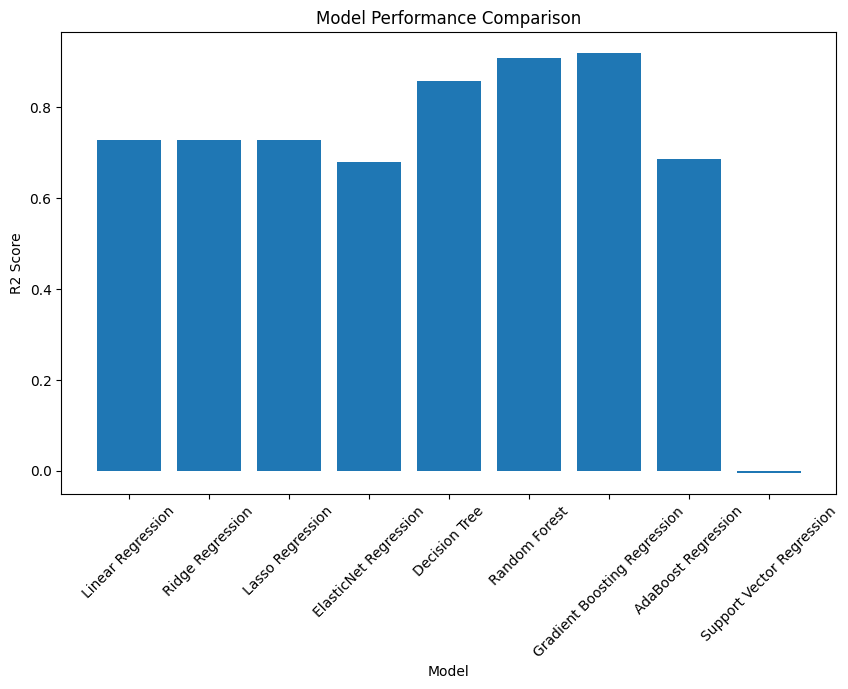

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# 데이터 로드
data = pd.read_csv("new_data.csv")

# 입력 특성과 타깃 변수 분리
X = data.drop(['price','model','Unnamed: 0'], axis=1)
y = data['price']

# 훈련 세트와 테스트 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 입력 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 생성
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'Support Vector Regression': SVR()
}

# 모델 학습 및 평가
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2

# 성능 비교 결과 출력
for name, r2 in results.items():
    print(f'{name}: R2 Score = {r2:.4f}')

# 모델 성능 비교 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()

Linear Regression: MSE = 258126.7897
Ridge Regression: MSE = 258417.5984
Lasso Regression: MSE = 259068.2246
ElasticNet Regression: MSE = 304918.3786
Decision Tree: MSE = 143038.6038
Random Forest: MSE = 74911.8020
Gradient Boosting Regression: MSE = 76638.8472
AdaBoost Regression: MSE = 306446.8784
Support Vector Regression: MSE = 956253.4568


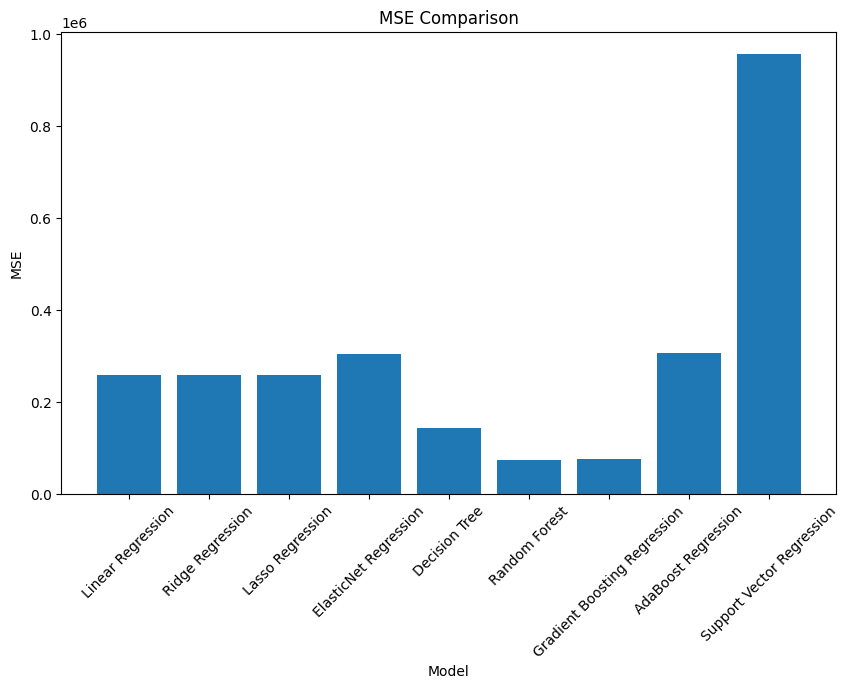

In [110]:
from sklearn.metrics import mean_squared_error

# 모델 생성 및 학습
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'Support Vector Regression': SVR()
}

# 예측 결과 및 MSE 계산
results2 = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    results2[name] = mse

# 성능 비교 결과 출력
for name, mse in results2.items():
    print(f'{name}: MSE = {mse:.4f}')

# MSE 결과 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(results2.keys(), results2.values())
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Comparison')
plt.xticks(rotation=45)
plt.show()

In [111]:
data2 = data

In [112]:
data2

,Unnamed: 0,model,year,distance,fuel,auto,efficiency,max_power,max_toque,method,insurance,is_genesis,price
0,0,현대 더 뉴 그랜저 하이브리드 2.4 HEV 르블랑,1.0,37983.0,1.0,1.0,16.2,200.0,25.1,0.0,4.0,0.0,3700.0
1,2,현대 더 뉴 그랜저 하이브리드 2.4 HEV 익스클루시브,3.0,43818.0,1.0,1.0,16.2,159.0,21.0,0.0,2.0,0.0,3469.0
2,3,현대 그랜저IG 2.4 프리미엄,5.0,61406.0,1.0,1.0,11.2,190.0,24.6,0.0,0.0,0.0,1940.0
3,4,현대 그랜저IG 하이브리드 2.4 HEV 익스클루시브,4.0,56098.0,1.0,1.0,16.2,199.0,26.7,0.0,0.0,0.0,2800.0
4,5,현대 그랜저IG 2.4 모던,5.0,47882.0,1.0,1.0,11.2,190.0,24.6,0.0,0.0,0.0,2099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,1096,기아 K5 2.4 프레스티지,12.0,143667.0,1.0,1.0,13.0,201.0,25.5,0.0,4.0,0.0,630.0
523,1097,기아 K5 하이브리드 2세대 2.0 HEV 노블레스 스페셜,4.0,49500.0,1.0,1.0,17.0,191.0,27.0,0.0,3.0,0.0,2250.0
524,1098,기아 K5 2.0 프레스티지,12.0,161755.0,1.0,1.0,13.0,165.0,20.2,0.0,4.0,0.0,460.0
525,1099,기아 K5 하이브리드 2세대 2.0 HEV 프레스티지,6.0,83723.0,1.0,1.0,17.5,191.0,27.0,0.0,2.0,0.0,1690.0


In [113]:
data2 = data2.drop(['Unnamed: 0'], axis=1)
data2['model'] = data2['model'].str[:2]


In [114]:
data2

,model,year,distance,fuel,auto,efficiency,max_power,max_toque,method,insurance,is_genesis,price
0,현대,1.0,37983.0,1.0,1.0,16.2,200.0,25.1,0.0,4.0,0.0,3700.0
1,현대,3.0,43818.0,1.0,1.0,16.2,159.0,21.0,0.0,2.0,0.0,3469.0
2,현대,5.0,61406.0,1.0,1.0,11.2,190.0,24.6,0.0,0.0,0.0,1940.0
3,현대,4.0,56098.0,1.0,1.0,16.2,199.0,26.7,0.0,0.0,0.0,2800.0
4,현대,5.0,47882.0,1.0,1.0,11.2,190.0,24.6,0.0,0.0,0.0,2099.0
...,...,...,...,...,...,...,...,...,...,...,...,...
522,기아,12.0,143667.0,1.0,1.0,13.0,201.0,25.5,0.0,4.0,0.0,630.0
523,기아,4.0,49500.0,1.0,1.0,17.0,191.0,27.0,0.0,3.0,0.0,2250.0
524,기아,12.0,161755.0,1.0,1.0,13.0,165.0,20.2,0.0,4.0,0.0,460.0
525,기아,6.0,83723.0,1.0,1.0,17.5,191.0,27.0,0.0,2.0,0.0,1690.0


In [115]:
data2.loc[data2['model'] == '기아', 'model'] = 1
data2.loc[data2['model'] == '현대', 'model'] = 2


In [116]:
data2

,model,year,distance,fuel,auto,efficiency,max_power,max_toque,method,insurance,is_genesis,price
0,2,1.0,37983.0,1.0,1.0,16.2,200.0,25.1,0.0,4.0,0.0,3700.0
1,2,3.0,43818.0,1.0,1.0,16.2,159.0,21.0,0.0,2.0,0.0,3469.0
2,2,5.0,61406.0,1.0,1.0,11.2,190.0,24.6,0.0,0.0,0.0,1940.0
3,2,4.0,56098.0,1.0,1.0,16.2,199.0,26.7,0.0,0.0,0.0,2800.0
4,2,5.0,47882.0,1.0,1.0,11.2,190.0,24.6,0.0,0.0,0.0,2099.0
...,...,...,...,...,...,...,...,...,...,...,...,...
522,1,12.0,143667.0,1.0,1.0,13.0,201.0,25.5,0.0,4.0,0.0,630.0
523,1,4.0,49500.0,1.0,1.0,17.0,191.0,27.0,0.0,3.0,0.0,2250.0
524,1,12.0,161755.0,1.0,1.0,13.0,165.0,20.2,0.0,4.0,0.0,460.0
525,1,6.0,83723.0,1.0,1.0,17.5,191.0,27.0,0.0,2.0,0.0,1690.0


Linear Regression: R2 Score = 0.7240
Ridge Regression: R2 Score = 0.7236
Lasso Regression: R2 Score = 0.7232
ElasticNet Regression: R2 Score = 0.6766
Decision Tree: R2 Score = 0.8896
Random Forest: R2 Score = 0.9111
Gradient Boosting Regression: R2 Score = 0.9216
AdaBoost Regression: R2 Score = 0.7043
Support Vector Regression: R2 Score = -0.0116


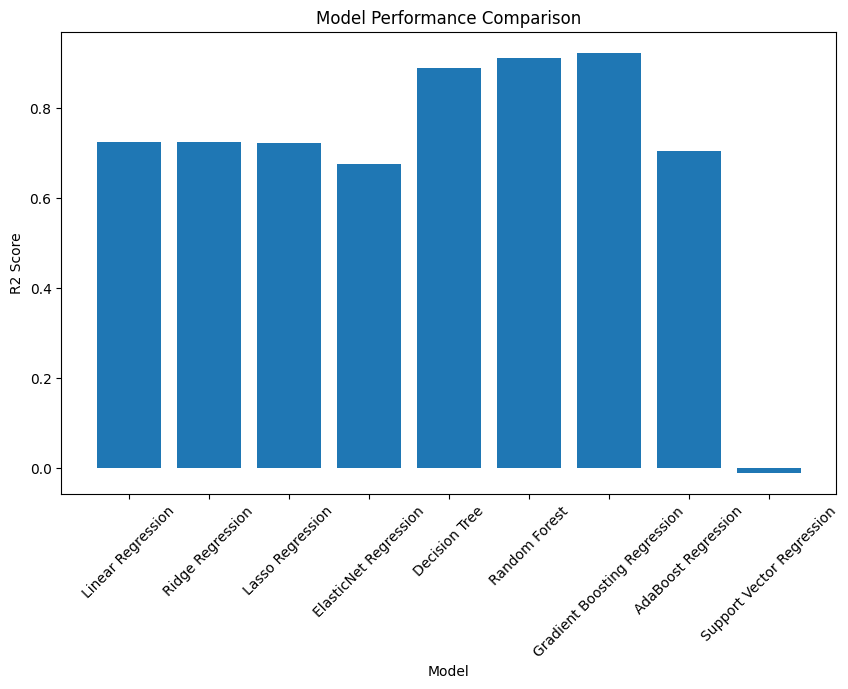

In [117]:

# 입력 특성과 타깃 변수 분리
X = data2.drop(['price', 'is_genesis'], axis=1)
y = data2['price']

# 훈련 세트와 테스트 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 입력 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 생성
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'Support Vector Regression': SVR()
}

# 모델 학습 및 평가
results3 = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    results3[name] = r2

# 성능 비교 결과 출력
for name, r2 in results3.items():
    print(f'{name}: R2 Score = {r2:.4f}')

# 모델 성능 비교 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(results3.keys(), results3.values())
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()

Linear Regression: MSE = 262574.2086
Ridge Regression: MSE = 262889.7169
Lasso Regression: MSE = 263328.2535
ElasticNet Regression: MSE = 307639.2386
Decision Tree: MSE = 155073.3208
Random Forest: MSE = 85550.6079
Gradient Boosting Regression: MSE = 73985.4096
AdaBoost Regression: MSE = 328338.6421
Support Vector Regression: MSE = 962212.4495


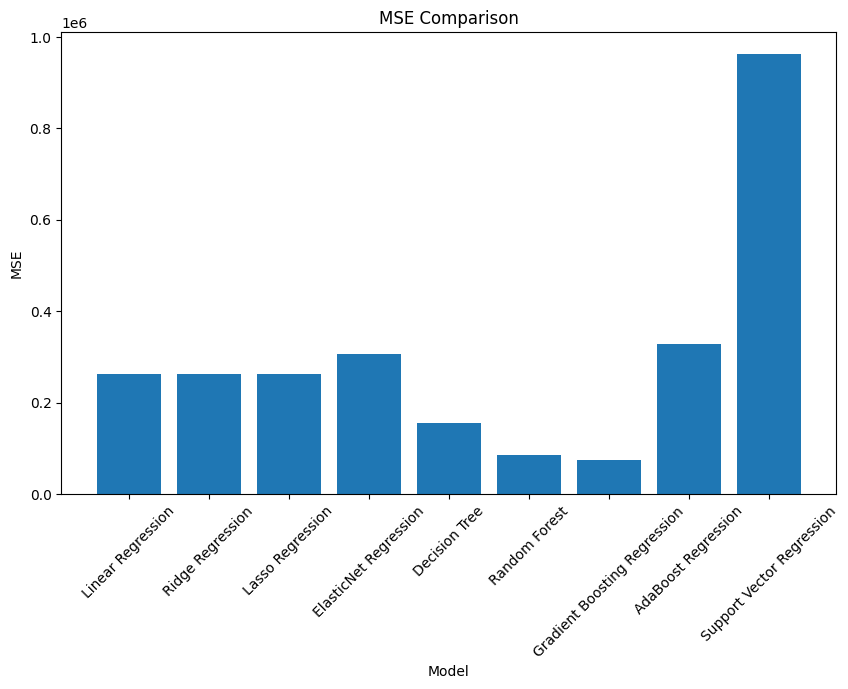

In [118]:
# 모델 생성 및 학습
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'Support Vector Regression': SVR()
}

# 예측 결과 및 MSE 계산
results4 = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    results4[name] = mse

# 성능 비교 결과 출력
for name, mse in results4.items():
    print(f'{name}: MSE = {mse:.4f}')

# MSE 결과 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(results4.keys(), results4.values())
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Comparison')
plt.xticks(rotation=45)
plt.show()